In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# READ CSV

In [81]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

In [82]:
data.shape

(40000, 14)

In [83]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


data.info()

In [85]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


## Label Encoder kullanarak kategorik verileri modele sokmak icin duzenliyoruz.

In [86]:
from sklearn.preprocessing import LabelEncoder

newdata = data
le = LabelEncoder()
for col in newdata.columns:
    if(newdata[col].dtype == 'object'):
        newdata.loc[:,col] = le.fit_transform(newdata.loc[:,col])
        
newdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


## Korelasyon Matrisi ile featurelar arasında bulunan ilişkileri gözlemliyoruz.

In [87]:
correlation = newdata.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
age,1.000,-0.020,-0.387,-0.091,-0.015,0.082,-0.180,0.000,0.041,-0.012,-0.063,-0.036,0.016,-0.020
job,-0.020,1.000,0.052,0.174,-0.005,0.015,-0.114,-0.024,-0.078,0.028,-0.107,-0.002,0.014,0.017
marital,-0.387,0.052,1.000,0.096,-0.005,0.009,0.004,-0.043,-0.029,0.000,-0.007,0.016,-0.001,0.030
education,-0.091,0.174,0.096,1.000,-0.007,0.067,-0.084,-0.044,-0.096,0.036,-0.066,0.002,0.017,0.038
default,-0.015,-0.005,-0.005,-0.007,1.000,-0.070,-0.019,0.075,0.007,0.006,0.014,-0.009,0.012,-0.007
balance,0.082,0.015,0.009,0.067,-0.070,1.000,-0.050,-0.081,-0.012,0.012,0.024,0.014,-0.008,0.030
housing,-0.180,-0.114,0.004,-0.084,-0.019,-0.050,1.000,0.004,0.164,-0.051,0.327,0.022,-0.055,-0.054
loan,0.000,-0.024,-0.043,-0.044,0.075,-0.081,0.004,1.000,-0.031,0.006,0.027,-0.004,0.001,-0.031
contact,0.041,-0.078,-0.029,-0.096,0.007,-0.012,0.164,-0.031,1.000,-0.046,0.410,-0.008,0.003,-0.090
day,-0.012,0.028,0.000,0.036,0.006,0.012,-0.051,0.006,-0.046,1.000,-0.003,-0.033,0.165,-0.006


### !!! y label'ı "duration" feature'ı arasında pozitif bir korelasyon mevcut. Bu nedenle müşterilerin analizinde bu özelliğe daha çok odaklanmalıyız.

In [88]:
X = newdata.iloc[:,:-1].values
y = newdata.iloc[:,-1].values

## Verilerde eksik veriler yoktu. Kategorik verileri de uygun hale getirdikten sonra model oluşturup değerlendirme aşamasına geçiyoruz. 

### RANDOM FOREST CLASSIFIER

F1 score: [0.0, 0.0, 0.0, 0.0007207207207207207, 0.002629752923082999, 0.028598680404626448, 0.13591997594352154, 0.24225739501763854, 0.30224289719495995, 0.3468715476653458, 0.37991978400851933, 0.4050755106446299, 0.4075228512126886, 0.41227343760453855]
accuracy score: [0.9276, 0.9276, 0.9276, 0.9276249999999999, 0.9276500000000001, 0.9284000000000001, 0.93035, 0.932925, 0.933925, 0.93485, 0.9361, 0.9369, 0.93635, 0.936225]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7479
           1       0.56      0.31      0.40       521

    accuracy                           0.94      8000
   macro avg       0.76      0.65      0.68      8000
weighted avg       0.93      0.94      0.93      8000



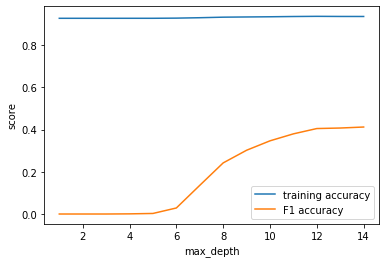

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

scoresAc = []
scoresF1 = []

preds = []
actual_labels = []

kf = KFold(n_splits=5,shuffle=True)


for i in range(1,15):
  model_rcv= RandomForestClassifier(max_depth=i ,n_estimators = 200,n_jobs= 5) 
  aux1 =[]
  aux2 = []
  for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator = model_rcv.fit(X_train,y_train)
    
    predictions = estimator.predict(X_test)
    scoreF1 = metrics.f1_score(y_test,predictions)
    accuracy = metrics.accuracy_score(y_test,predictions)
    aux1.append(accuracy)
    aux2.append(scoreF1)
  
  scoresAc.append(np.average(aux1))
  scoresF1.append(np.average(aux2))

print("F1 score: {0}".format((scoresF1)))

print("accuracy score: {0}".format((scoresAc)))
report = classification_report(y_test, predictions)
print(report)

plt.plot(range(1,15), scoresAc, label="training accuracy")
plt.plot(range(1,15), scoresF1, label="F1 accuracy") 
plt.ylabel("score")
plt.xlabel("max_depth")
plt.legend()

### KNEIGHBORS CLASSIFIER

F1 score: [0.30174305820124026, 0.19081786844014564, 0.33138511670369974, 0.2267344144391959, 0.3311668541189074, 0.2534185052722723, 0.33487029813265257, 0.2651059203117162, 0.3453941989536154, 0.2736248032900127, 0.3337983019131872, 0.28474529365963075, 0.32376611231029295, 0.29042836777849235]
accuracy score: [0.901675, 0.9249750000000001, 0.9213250000000001, 0.92605, 0.9261250000000001, 0.9274000000000001, 0.928075, 0.928475, 0.9294499999999999, 0.9287000000000001, 0.929875, 0.929375, 0.92935, 0.929875]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7441
           1       0.57      0.21      0.31       559

    accuracy                           0.93      8000
   macro avg       0.76      0.60      0.64      8000
weighted avg       0.92      0.93      0.92      8000



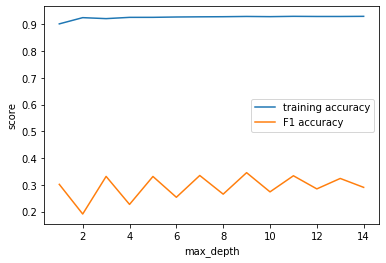

In [90]:
from sklearn.neighbors import KNeighborsClassifier

scoresAc = []
scoresF1 = []

preds = []
actual_labels = []
kf = KFold(n_splits=5,shuffle=True)
for i in range(1,15):
  model_knn= KNeighborsClassifier(n_neighbors = i)
  aux1 =[]
  aux2 = []
  for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    estimator = model_knn.fit(X_train,y_train)
    
    predictions = estimator.predict(X_test)
    scoreF1 = metrics.f1_score(y_test,predictions)
    accuracy = metrics.accuracy_score(y_test,predictions)
    aux1.append(accuracy)
    aux2.append(scoreF1)
  
  scoresAc.append(np.average(aux1))
  scoresF1.append(np.average(aux2))

print("F1 score: {0}".format((scoresF1)))

print("accuracy score: {0}".format((scoresAc)))
report = classification_report(y_test, predictions)
print(report)

plt.plot(range(1,15), scoresAc, label="training accuracy")
plt.plot(range(1,15), scoresF1, label="F1 accuracy") 
plt.ylabel("score")
plt.xlabel("max_depth")
plt.legend()

### GAUSSIAN NB

In [91]:
from sklearn.naive_bayes import GaussianNB

scoresAc = []
scoresF1 = []

preds = []

kf = KFold(n_splits=5,shuffle=True)

for train_index,test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  
  model_gaussian = GaussianNB()
  estimator = model_gaussian.fit(X_train, y_train)

  #model4 = SVC(C=1000, kernel = "rbf")
  #estimator = model4.fit(X_train, y_train)

  predictions = estimator.predict(X_test)
  scoreF1 = metrics.f1_score(y_test,predictions)
  accuracy = metrics.accuracy_score(y_test,predictions)

  
scoresAc.append(accuracy)
scoresF1.append(scoreF1)

print("F1 score: {0}".format((np.average(scoreF1))))

print("accuracy score: {0}".format(np.average(scoresAc)))

report = classification_report(y_test, predictions)
print(report)

F1 score: 0.46005774783445624
accuracy score: 0.929875
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7386
           1       0.56      0.39      0.46       614

    accuracy                           0.93      8000
   macro avg       0.76      0.68      0.71      8000
weighted avg       0.92      0.93      0.92      8000



### SUPPORT VECTOR MACHINE(SVM)

In [92]:
from sklearn.svm import SVC

scoresAc = []
scoresF1 = []

preds = []

kf = KFold(n_splits=5,shuffle=True)

for train_index,test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  
  model_svc = SVC(C=1000, kernel = "rbf")
  estimator = model_svc.fit(X_train, y_train)

  predictions = estimator.predict(X_test)
  scoreF1 = metrics.f1_score(y_test,predictions)
  accuracy = metrics.accuracy_score(y_test,predictions)

  
scoresAc.append(accuracy)
scoresF1.append(scoreF1)

print("F1 score: {0}".format((np.average(scoreF1))))

print("accuracy score: {0}".format(np.average(scoresAc)))

report = classification_report(y_test, predictions)
print(report)

F1 score: 0.1496815286624204
accuracy score: 0.93325
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7439
           1       0.70      0.08      0.15       561

    accuracy                           0.93      8000
   macro avg       0.82      0.54      0.56      8000
weighted avg       0.92      0.93      0.91      8000

